In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
import numpy as np
import cv2 as cv
import glob
import matplotlib.pyplot as plt
from google.colab.patches import cv_imshow

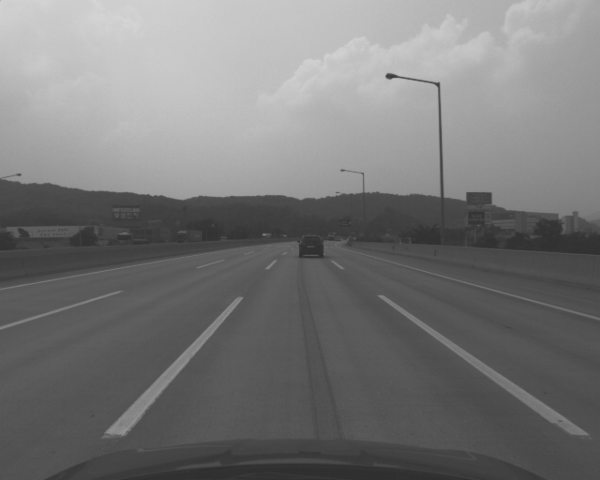

In [ ]:
img = cv.imread('/content/gdrive/MyDrive/MachineVision/lanes.bmp',cv.IMREAD_GRAYSCALE)
cv_imshow(img)

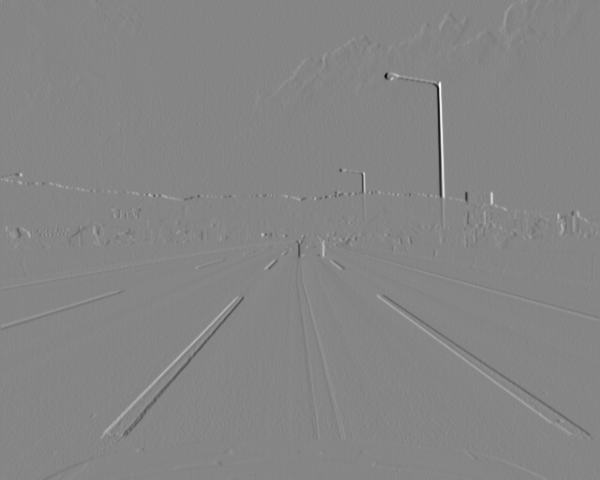

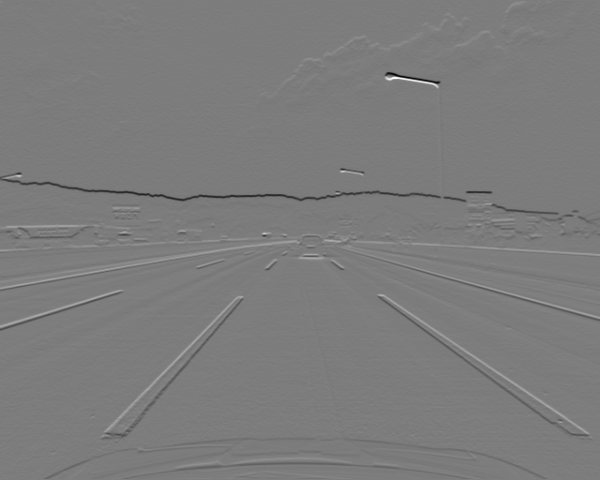

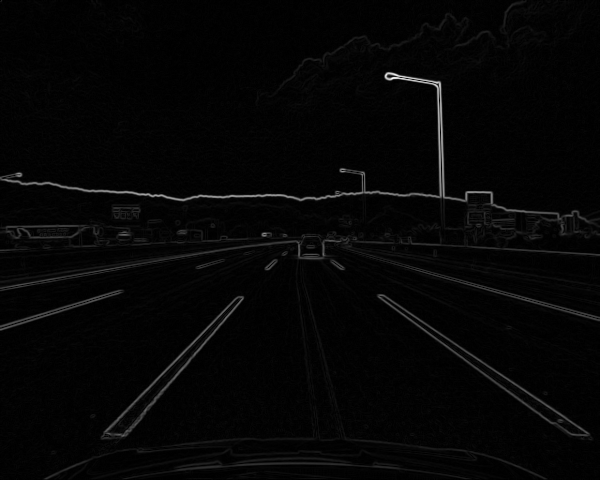

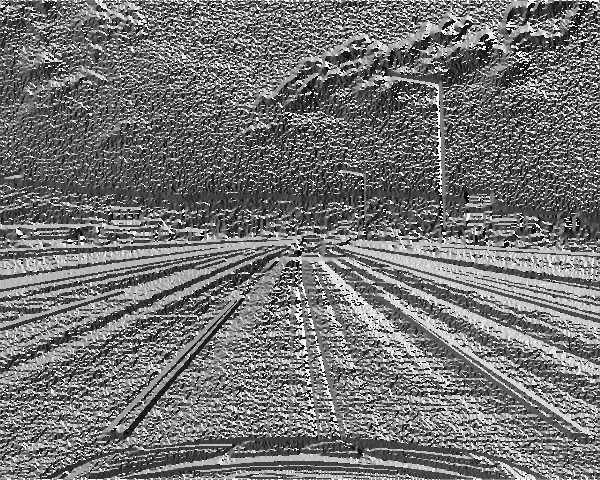

In [ ]:
Ix = cv.Sobel(img,ddepth=cv.CV_64F,dx=1,dy=0,ksize=3)
Iy = cv.Sobel(img,ddepth=cv.CV_64F,dx=0,dy=1,ksize=3)
mag = np.sqrt(np.square(Ix) + np.square(Iy))
ori = np.arctan2(Iy,Ix) * 180/np.pi

Ix_ = (Ix-Ix.min()) / (Ix.max()-Ix.min()) * 255
Iy_ = (Iy-Iy.min()) / (Iy.max()-Iy.min()) * 255
mag2 = (mag-mag.min()) / (mag.max()-mag.min()) * 255
ori2 = (ori-ori.min()) / (ori.max()-ori.min()) * 255

cv_imshow(Ix_)
cv_imshow(Iy_)
cv_imshow(mag2)
cv_imshow(ori2)

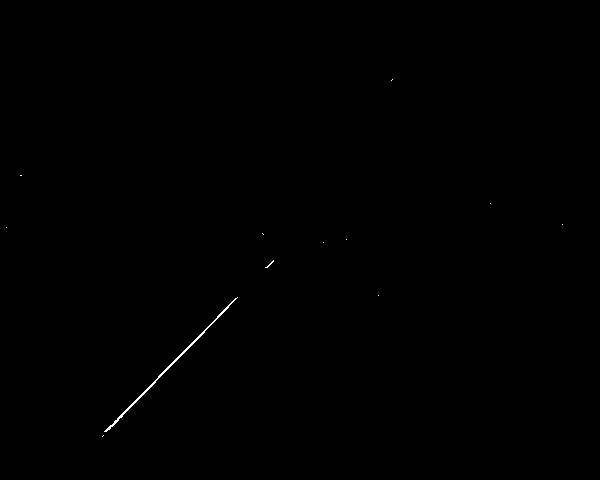

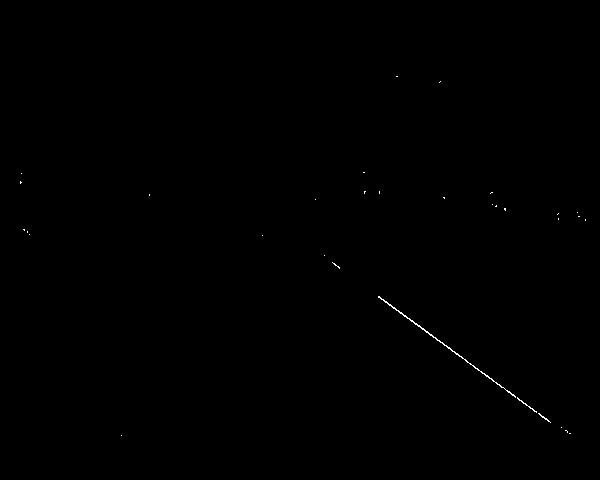

In [ ]:
result2 = np.zeros(img.shape)
Lid = np.where((mag>100) & (ori>30) & (ori<60))
result2[Lid] = 255
result3 = np.zeros(img.shape)
Rid = np.where((mag>100) & (ori>-60) & (ori<-30))
result3[Rid] = 255
cv_imshow(result2)
cv_imshow(result3)

In [ ]:
def f(x,a,b):
  return a*x+b

def ransac_line_fiting(x,y,r,t):
  iter = np.round(np.log(1-0.999) / np.log(1-(1-r)**2) + 1)
  num_max = 0
  for i in np.arange(iter):
    id = np.random.permutation(len(x))
    xs = x[id[:2]]
    ys = y[id[:2]]
    A = np.vstack([xs, np.ones(len(xs))]).T
    ab = np.dot(np.linalg.inv(np.dot(A.T, A)), np.dot(A.T, ys))
    dist = np.abs(ab[0]*x-y+ab[1])/np.sqrt(ab[0]**2+1)
    numInliers = sum(dist < t)
    if numInliers > num_max:
      ab_max = ab
      num_max = numInliers
  return ab_max, num_max

[ -1.01980198 538.11881188]


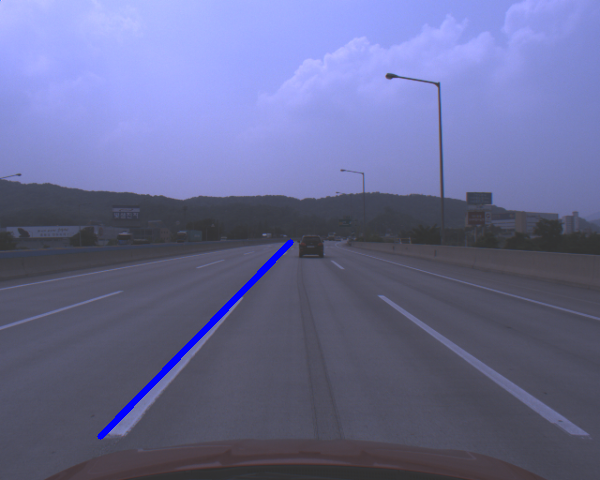

In [ ]:
xno = Lid[1]
yno = Lid[0]
abno, max = ransac_line_fiting(xno,yno,0.5,2)
print(abno)

x1=100
y1=int(f(x1,abno[0],abno[1]))
x2=290
y2=int(f(x2,abno[0],abno[1]))
imgOri2 = cv.imread('/content/gdrive/MyDrive/MachineVision/lanes.bmp')
imgL = cv.line(imgOri2, (x1, y1), (x2, y2), (255, 0, 0), 5)
cv_imshow(imgL)

[ 0.72477064 22.36697248]


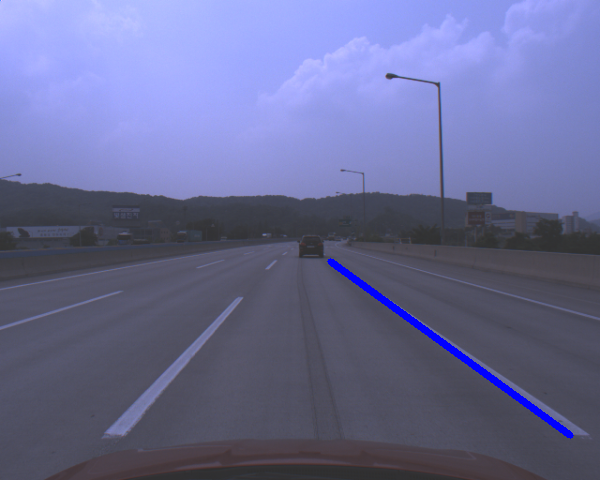

In [ ]:
xno = Rid[1]
yno = Rid[0]
abno, max = ransac_line_fiting(xno,yno,0.5,2)
print(abno)

x1=330
y1=int(f(x1,abno[0],abno[1]))
x2=570
y2=int(f(x2,abno[0],abno[1]))
imgOri1 = cv.imread('/content/gdrive/MyDrive/MachineVision/lanes.bmp')
imgR = cv.line(imgOri1, (x1, y1), (x2, y2), (255, 0, 0), 5)
cv_imshow(imgR)

In [ ]:
int(y1)

239

In [ ]:
np.max(xno)

585